<a href="https://colab.research.google.com/github/IvanIndargo/Datamining_exersice/blob/main/AFL2_Customer_Analysis_IvanIndargo%26MiguelStanley.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
!pip install kneed
from kneed import KneeLocator
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.preprocessing import LabelEncoder, StandardScaler
from matplotlib import pyplot as plt
import scipy.cluster.hierarchy as sch
from sklearn.cluster import AgglomerativeClustering, KMeans
from scipy.cluster.hierarchy import fcluster, linkage, dendrogram
from sklearn.metrics import davies_bouldin_score, silhouette_score
from sklearn.impute import SimpleImputer
import scipy.cluster.hierarchy as sch

# Exercise 1: Clustering Method

In this exercise we will explore how each clustering algorithm discussed in the class works.

## Load Dataset

In [3]:
#link file excel di dalam github
url = 'https://raw.githubusercontent.com/IvanIndargo/dataset-DM/main/customer_analysis.xlsx'
#Load the Excel file
df = pd.read_excel(url)
#menampilkan 5 data teratas dari dataset
df.head()

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
0,5524,1957,Graduation,Single,58138.0,0,0,04-09-2012,58,635,...,7,0,0,0,0,0,0,3,11,1
1,2174,1954,Graduation,Single,46344.0,1,1,08-03-2014,38,11,...,5,0,0,0,0,0,0,3,11,0
2,4141,1965,Graduation,Together,71613.0,0,0,21-08-2013,26,426,...,4,0,0,0,0,0,0,3,11,0
3,6182,1984,Graduation,Together,26646.0,1,0,10-02-2014,26,11,...,6,0,0,0,0,0,0,3,11,0
4,5324,1981,PhD,Married,58293.0,1,0,19-01-2014,94,173,...,5,0,0,0,0,0,0,3,11,0


In [4]:
#mengecek value dari setiap kolom yang ada di dalam dataset, apakah terdapat nilai null atau tidak
df.isnull().sum()

,0
ID,0
Year_Birth,0
Education,0
Marital_Status,0
Income,24
Kidhome,0
Teenhome,0
Dt_Customer,0
Recency,0
MntWines,0


In [5]:
#mengecek informasi dari setiap kolom yang ada di dataset, seperti berapa jumlah data yang terdapat di dalam data set,
#tipe data apa yang digunakan di setiap kolom dataset, dan jumlah kolom yang ada di dalam dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 29 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ID                   2240 non-null   int64  
 1   Year_Birth           2240 non-null   int64  
 2   Education            2240 non-null   object 
 3   Marital_Status       2240 non-null   object 
 4   Income               2216 non-null   float64
 5   Kidhome              2240 non-null   int64  
 6   Teenhome             2240 non-null   int64  
 7   Dt_Customer          2240 non-null   object 
 8   Recency              2240 non-null   int64  
 9   MntWines             2240 non-null   int64  
 10  MntFruits            2240 non-null   int64  
 11  MntMeatProducts      2240 non-null   int64  
 12  MntFishProducts      2240 non-null   int64  
 13  MntSweetProducts     2240 non-null   int64  
 14  MntGoldProds         2240 non-null   int64  
 15  NumDealsPurchases    2240 non-null   i

In [6]:
#menampilkan deskripsi dari setiap kolom dataset untuk mengetahui nilai rata-rata, standar deviasi, nilai minimal, nilai maksimal, nilai tengah, dan lain-lain untuk memudahkan analisa
df.describe()

,ID,Year_Birth,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
count,2240.000000,2240.000000,2216.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,...,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.0,2240.0,2240.000000
mean,5592.159821,1968.805804,52247.251354,0.444196,0.506250,49.109375,303.935714,26.302232,166.950000,37.525446,...,5.316518,0.072768,0.074554,0.072768,0.064286,0.013393,0.009375,3.0,11.0,0.149107
std,3246.662198,11.984069,25173.076661,0.538398,0.544538,28.962453,336.597393,39.773434,225.715373,54.628979,...,2.426645,0.259813,0.262728,0.259813,0.245316,0.114976,0.096391,0.0,0.0,0.356274
min,0.000000,1893.000000,1730.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000
25%,2828.250000,1959.000000,35303.000000,0.000000,0.000000,24.000000,23.750000,1.000000,16.000000,3.000000,...,3.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000
50%,5458.500000,1970.000000,51381.500000,0.000000,0.000000,49.000000,173.500000,8.000000,67.000000,12.000000,...,6.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000
75%,8427.750000,1977.000000,68522.000000,1.000000,1.000000,74.000000,504.250000,33.000000,232.000000,50.000000,...,7.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000
max,11191.000000,1996.000000,666666.000000,2.000000,2.000000,99.000000,1493.000000,199.000000,1725.000000,259.000000,...,20.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,3.0,11.0,1.000000


In [7]:
#menghapus baris data yang memiliki nilai null
df = df.dropna()
#mengecek ulang untuk memastikan seluruh kolom tidak memiliki nilai null
df.isnull().sum()

,0
ID,0
Year_Birth,0
Education,0
Marital_Status,0
Income,0
Kidhome,0
Teenhome,0
Dt_Customer,0
Recency,0
MntWines,0


In [8]:
#menghapus kolom 'id' di dalam dataset karena di dalam clustering kolom identifier tidak diperlukan untuk menemukan pola clustering
df.drop('ID', axis=1, inplace=True)
#menghapus beberapa kolom yang tidak berpengaruh dalam menemukan pola untuk clustering
#bebrapa kolom yang dihapus ini juga memiliki data yang signifikan sama
df.drop('Z_CostContact', axis=1, inplace=True)
df.drop('Z_Revenue', axis=1, inplace=True)
df.drop('Complain', axis=1, inplace=True)
df.drop('AcceptedCmp1', axis=1, inplace=True)
df.drop('AcceptedCmp2', axis=1, inplace=True)
df.drop('AcceptedCmp3', axis=1, inplace=True)
df.drop('AcceptedCmp4', axis=1, inplace=True)
df.drop('AcceptedCmp5', axis=1, inplace=True)
df.drop('Response', axis=1, inplace=True)

<ipython-input-8-3307d3276ab3>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.drop('ID', axis=1, inplace=True)
<ipython-input-8-3307d3276ab3>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.drop('Z_CostContact', axis=1, inplace=True)
<ipython-input-8-3307d3276ab3>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.drop('Z_Revenue', axis=1, inplace=True)
<ipython-input-8-3307d3276ab3>:7: SettingWithCopyWarning: 
A value is try

In [9]:
#menambahkan kolom 'Age' dari tahun 2024 yang dikurangi dengan kolom 'Year_Birth' yang ada di dalam dataset
df["Age"] = 2024 - df["Year_Birth"]
#mengubah format kolom 'Dt_Customer' menjadi format '%d-%m-%Y' untuk dapat dilakukan pengambilan tahun saja
df['Dt_Customer'] = pd.to_datetime(df['Dt_Customer'], format='%d-%m-%Y')
#menambahkan kolom baru 'Duration_Customer' dengan hanya mengambil value tahun dari kolom 'Dt_Customer'
df['Duration_Customer'] = df['Dt_Customer'].dt.year
#mengubah value tahun dari 'Duration_Customer' menjadi jumlah tahun dari 2024 - tahun dari kolom 'Dt_Customer'
df['Duration_Customer'] = 2024 - df['Duration_Customer']
#menghapus kolom 'Year_Birth' dan 'Dt_Customer' karena sudah tidak diperlukan dan telah digantikan dengan kolom 'Age' dan 'Duration_Customer'
df.drop('Year_Birth', axis=1, inplace=True)
df.drop('Dt_Customer', axis=1, inplace=True)

<ipython-input-9-44aa765b3680>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["Age"] = 2024 - df["Year_Birth"]
<ipython-input-9-44aa765b3680>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Dt_Customer'] = pd.to_datetime(df['Dt_Customer'], format='%d-%m-%Y')
<ipython-input-9-44aa765b3680>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.

In [10]:
#mengubah tipe data dari kolom 'income' menjadi integer untuk memudahkan proses clustering
df['Income'] = df['Income'].astype(int)

<ipython-input-10-3b12fa009d7a>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Income'] = df['Income'].astype(int)


In [11]:
#mengecek value dari kolom 'education' dan 'Marital_Status' dan berapa jumlah data di masing-masing value nya
education_count = df['Education'].value_counts(dropna=False)
print(education_count)
Marital_Status_count = df['Marital_Status'].value_counts(dropna=False)
print(Marital_Status_count)

Education
Graduation    1116
PhD            481
Master         365
2n Cycle       200
Basic           54
Name: count, dtype: int64
Marital_Status
Married     857
Together    573
Single      471
Divorced    232
Widow        76
Alone         3
Absurd        2
YOLO          2
Name: count, dtype: int64


In [12]:
#mengubah beberapa value dari kolom 'education' dan 'marital_status' yang memiliki value kurang jelas dan jumlah datanya sedikit
df['Education'] = df['Education'].replace({'2n Cycle': 'Master'})
df['Marital_Status'] = df['Marital_Status'].replace({'Alone': 'Single', 'YOLO': 'Single', 'Absurd': 'Single'})
#melakukan maping untuk kolom kategorikal 'education' dan 'marital_status' agar menjadi integer untuk memudahkan proses clustering
df['Education'] = df['Education'].map({'Basic': 0, 'Graduation': 1, 'Master': 2, 'PhD': 3})
df['Marital_Status'] = df['Marital_Status'].map({'Single': 0, 'Married': 1, 'Divorced': 2, 'Together': 3, 'Widow': 4})
df.head()

,Education,Marital_Status,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,Age,Duration_Customer
0,1,0,58138,0,0,58,635,88,546,172,88,88,3,8,10,4,7,67,12
1,1,0,46344,1,1,38,11,1,6,2,1,6,2,1,1,2,5,70,10
2,1,3,71613,0,0,26,426,49,127,111,21,42,1,8,2,10,4,59,11
3,1,3,26646,1,0,26,11,4,20,10,3,5,2,2,0,4,6,40,10
4,3,1,58293,1,0,94,173,43,118,46,27,15,5,5,3,6,5,43,10


In [13]:
#memastikan kembali setiap kolom dari dataset sudah memiliki tipe data integer untuk proses clustering
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2216 entries, 0 to 2239
Data columns (total 19 columns):
 #   Column               Non-Null Count  Dtype
---  ------               --------------  -----
 0   Education            2216 non-null   int64
 1   Marital_Status       2216 non-null   int64
 2   Income               2216 non-null   int64
 3   Kidhome              2216 non-null   int64
 4   Teenhome             2216 non-null   int64
 5   Recency              2216 non-null   int64
 6   MntWines             2216 non-null   int64
 7   MntFruits            2216 non-null   int64
 8   MntMeatProducts      2216 non-null   int64
 9   MntFishProducts      2216 non-null   int64
 10  MntSweetProducts     2216 non-null   int64
 11  MntGoldProds         2216 non-null   int64
 12  NumDealsPurchases    2216 non-null   int64
 13  NumWebPurchases      2216 non-null   int64
 14  NumCatalogPurchases  2216 non-null   int64
 15  NumStorePurchases    2216 non-null   int64
 16  NumWebVisitsMonth    2216 non

In [14]:
#digunakan untuk menyembingkan skala dari value setiap kolom untuk meningkatkan peforma modeling cluster
scaler = StandardScaler()
df_scaled = scaler.fit_transform(df)
df_scaled = pd.DataFrame(df_scaled, columns=df.columns)
df_scaled.head()

,Education,Marital_Status,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,Age,Duration_Customer
0,-0.791254,-1.273427,0.234063,-0.823039,-0.928972,0.310532,0.978226,1.549429,1.690227,2.454568,1.484827,0.850031,0.351713,1.428553,2.504712,-0.554143,0.693232,0.986443,1.500343
1,-0.791254,-1.273427,-0.234559,1.039938,0.909066,-0.380509,-0.872024,-0.637328,-0.717986,-0.651038,-0.633880,-0.732867,-0.168231,-1.125881,-0.571082,-1.169518,-0.131574,1.236801,-1.417393
2,-0.791254,1.258195,0.769478,-0.823039,-0.928972,-0.795134,0.358511,0.569159,-0.178368,1.340203,-0.146821,-0.037937,-0.688176,1.428553,-0.229327,1.291982,-0.543978,0.318822,0.041475
3,-0.791254,1.258195,-1.017239,1.039938,-0.928972,-0.795134,-0.872024,-0.561922,-0.655551,-0.504892,-0.585174,-0.752171,-0.168231,-0.760962,-0.912837,-0.554143,0.280829,-1.266777,-1.417393
4,1.589492,-0.429553,0.240221,1.039938,-0.928972,1.554407,-0.391671,0.418348,-0.218505,0.152766,-0.000703,-0.559135,1.391603,0.333796,0.112428,0.061232,-0.131574,-1.016420,-1.417393


# K-Means Clustering

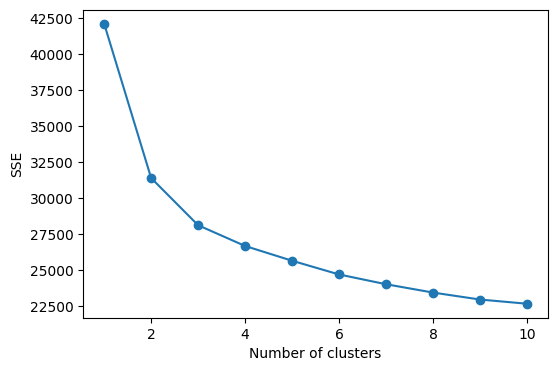

In [15]:
#mengatur parameter untuk mengevaluasi K
sse=[]
#memperiksa mengatur range untuk mengecek jumlah clustering
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, init='random', max_iter=300, random_state=42)
    kmeans.fit(df_scaled)
    sse.append(kmeans.inertia_)
#Visualisasikan metode siku secara menggunakan plotlib
plt.figure(figsize=(6, 4))
plt.plot(range(1, 11), sse, marker='o')
plt.xlabel('Number of clusters')
plt.ylabel('SSE')
plt.show()

In [16]:
#digunakan untuk menunjukkan jumlah k terbaik untuk proses clustering
kneedle = KneeLocator(range(1, 11), sse, curve='convex', direction='decreasing')
print("The best k for your model is", kneedle.elbow)

The best k for your model is 3


In [17]:
kmeans = KMeans(n_clusters=3, init='random', max_iter=300, random_state=42)
y_pred = kmeans.fit_predict(df_scaled)
#inverse data yang diskalakan untuk mendapatkan nilai asli
df_inverse = pd.DataFrame(scaler.inverse_transform(df_scaled), columns=df_scaled.columns)
#menambahkan label kluster ke data asli
df_inverse['KMeans'] = y_pred
# Analyze the clusters with the original values
df_inverse.head()

,Education,Marital_Status,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,Age,Duration_Customer,KMeans
0,1.0,0.0,58138.0,0.0,0.0,58.0,635.0,88.0,546.0,172.0,88.0,88.0,3.0,8.0,10.0,4.0,7.0,67.0,12.0,1
1,1.0,0.0,46344.0,1.0,1.0,38.0,11.0,1.0,6.0,2.0,1.0,6.0,2.0,1.0,1.0,2.0,5.0,70.0,10.0,2
2,1.0,3.0,71613.0,0.0,0.0,26.0,426.0,49.0,127.0,111.0,21.0,42.0,1.0,8.0,2.0,10.0,4.0,59.0,11.0,1
3,1.0,3.0,26646.0,1.0,0.0,26.0,11.0,4.0,20.0,10.0,3.0,5.0,2.0,2.0,0.0,4.0,6.0,40.0,10.0,2
4,3.0,1.0,58293.0,1.0,0.0,94.0,173.0,43.0,118.0,46.0,27.0,15.0,5.0,5.0,3.0,6.0,5.0,43.0,10.0,2


In [18]:
#mengecek hasil dan jumlah value di masing-masing cluster
df_inverse['KMeans'].value_counts().sort_index()

,count
KMeans,
0,604
1,588
2,1024


In [19]:
from sklearn.cluster import KMeans, AgglomerativeClustering
import numpy as np

# Fungsi untuk menghitung mode
def mode(series):
    return series.mode().iloc[0] if not series.mode().empty else np.nan
#Lakukan Pengklusteran KMeans
kmeans = KMeans(n_clusters=3, random_state=42)
df['KMeans'] = kmeans.fit_predict(df_scaled)
# Kelompokkan berdasarkan Kluster Aglomerat dan hitung statistik ringkasan
agg_dict = {
        'Education': ['mean', 'min', 'max'],
        'Marital_Status': ['mean', 'min', 'max'],
        'Income': ['mean', 'min', 'max'],
        'Kidhome': ['mean', 'min', 'max'],
        'Teenhome': ['mean', 'min', 'max'],
        'Recency': ['mean', 'min', 'max'],
        'MntWines': ['mean', 'min', 'max'],
        'MntFruits': ['mean', 'min', 'max'],
        'MntMeatProducts': ['mean', 'min', 'max'],
        'MntFishProducts': ['mean', 'min', 'max'],
        'MntSweetProducts': ['mean', 'min', 'max'],
        'MntGoldProds': ['mean', 'min', 'max'],
        'NumDealsPurchases': ['mean', 'min', 'max'],
        'NumWebPurchases': ['mean', 'min', 'max'],
        'NumCatalogPurchases': ['mean', 'min', 'max'],
        'NumStorePurchases': ['mean', 'min', 'max'],
        'NumWebVisitsMonth': ['mean', 'min', 'max'],
        'Age': ['mean', 'min', 'max'],
    }
agg_result = df.groupby('KMeans').agg(agg_dict)
# Meratakan kolom MultiIndex untuk keterbacaan yang lebih baik
agg_result.columns = [f"{col[0]} ({col[1]})" if col[1] else col[0] for col in agg_result.columns]
# Mengubah hasil untuk menukar baris dan kolom
agg_result_transposed = agg_result.transpose()
# Menampilkan hasil yang ditransposisi sebagai DataFrame yang ditata untuk visualisasi yang lebih baik
agg_result_styled = agg_result_transposed.style.format(precision=2)

#Tampilkan DataFrame yang ditata
agg_result_styled

KMeans,0,1,2
Education (mean),1.59,1.82,1.63
Education (min),0.00,0.00,0.00
Education (max),3.00,3.00,3.00
Marital_Status (mean),1.44,1.66,1.47
Marital_Status (min),0.00,0.00,0.00
Marital_Status (max),4.00,4.00,4.00
Income (mean),34718.90,57396.55,76469.18
Income (min),1730.00,4428.00,2447.00
Income (max),162397.00,94871.00,666666.00
Kidhome (mean),0.80,0.24,0.05


In [1]:
## Interpretasi
# Cluster 0: Klaster yang memiliki pendapatan rata-rata terendah, terdiri dari individu yang cenderung lebih muda dengan rata-rata usia anggota klaster ini 52,15 tahun. Pendidikan menengah dengan rata-rata skor pendidikan 1.59. Status perkawinan banyak belum menikah, dengan rata-rata 1.44. Mereka cenderung memiliki pola konsumsi yang lebih hemat.
# Cluster 1: Klaster yang memiliki pendapatan menengah, rata-rata usia 59,88 tahun, dan status perkawinan yang lebih banyak menikah. Rata-rata pendidikan 1.82, yang menunjukkan bahwa banyak dari mereka memiliki pendidikan tingkat universitas atau lebih tinggi. Memiliki daya beli yang lebih baik, namun dengan pola pengeluaran yang lebih hati-hati, meskipun masih lebih moderat dibandingkan klaster lainnya.
# Cluster 2: Klaster rata-rata pendapatan tinggi 76,469. Anggota klaster lebih tua, dengan usia rata-rata 55,60 tahun, dan sebagian besar memiliki rata-rata pendidikan tinggi 1.63. Cenderung memiliki sedikit anak atau keluarga yang kecil, dengan angka Kidhome dan Teenhome yang rendah (0.05 dan 0.19). Klaster ini menghabiskan jumlah yang jauh lebih besar pada produk premium, seperti anggur (MntWines = 591.66), daging (MntMeatProducts = 443.46), dan lainnya. Klaster ini berisi customer dengan kekayaan yang lebih tinggi dan pola konsumtif.

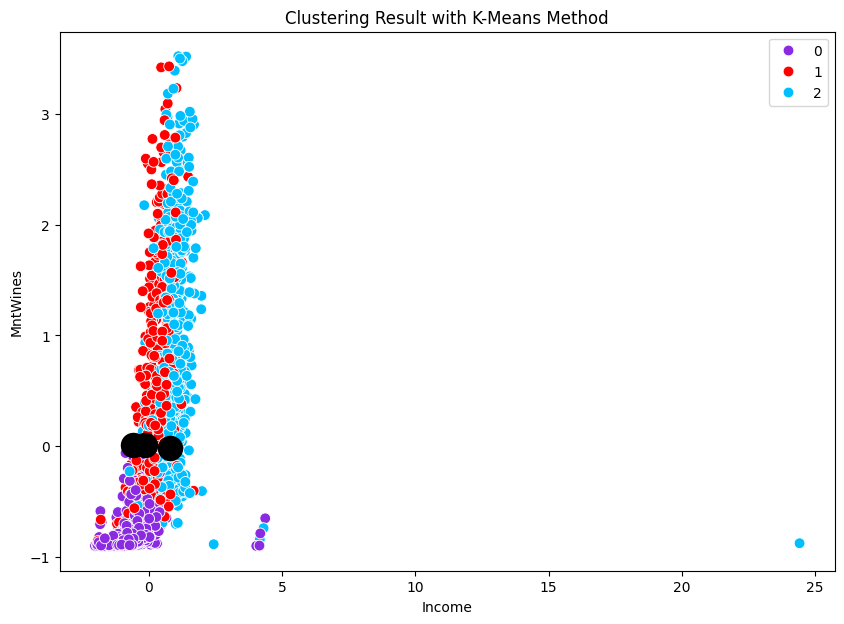

In [34]:
#memvisualisasikan hasil clustering dari income dan mntwines untuk melihat pendapatan dan penjualan wines
plt.figure(figsize=(10,7))
sns.scatterplot(x = "Income", y = "MntWines", hue=kmeans.labels_, palette=["blueviolet", "red", "deepskyblue"], data=df_scaled, s = 60)
plt.scatter(kmeans.cluster_centers_[:, 4], kmeans.cluster_centers_[:, 5], s=300, c="black")
plt.xlabel("Income")
plt.ylabel("MntWines")
plt.title("Clustering Result with K-Means Method")
plt.show()

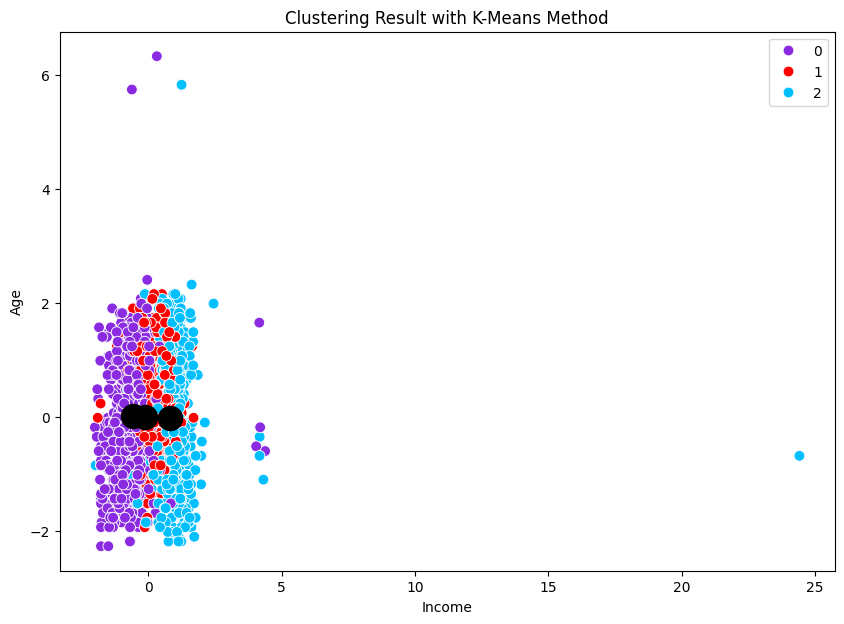

In [21]:
#memvisualisasikan hasil clustering dari income dan age untuk melihat pendapatan dan umur
plt.figure(figsize=(10,7))
sns.scatterplot(x = "Income", y = "Age", hue=kmeans.labels_, palette=["blueviolet", "red", "deepskyblue"], data=df_scaled, s = 60)
plt.scatter(kmeans.cluster_centers_[:, 4], kmeans.cluster_centers_[:, 5], s=300, c="black")
plt.xlabel("Income")
plt.ylabel("Age")
plt.title("Clustering Result with K-Means Method")
plt.show()

#Hierarchical Clustering

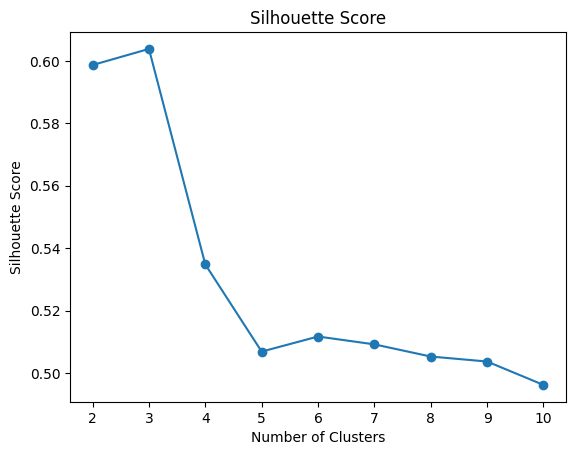

In [22]:
from sklearn.metrics import silhouette_score

silhouette_scores = []
k_range = range(2, 11)
for i in k_range :
    cluster_labels = fcluster(linkage(df, method='ward'), i, criterion='maxclust')
    silhouette_avg = silhouette_score(df, cluster_labels)
    silhouette_scores.append(silhouette_avg)

#Visualisasi silhoute skor, semakin tinggi semakin baik
plt.plot(range(2, 11), silhouette_scores, marker='o')
plt.xlabel("Number of Clusters")
plt.ylabel("Silhouette Score")
plt.title("Silhouette Score")
plt.show()

In [23]:
#mengecek jumlah kluster terbaik
best_k = k_range[silhouette_scores.index(max(silhouette_scores))]
print(f"The best number of clusters is: {best_k}")

The best number of clusters is: 3


In [24]:
#agglomerative clustering
agglo = AgglomerativeClustering(n_clusters=3, metric='euclidean', linkage='ward')
y_pred = agglo.fit_predict(df)

In [25]:
df['Agglo'] = y_pred
df.head()

,Education,Marital_Status,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,...,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,Age,Duration_Customer,KMeans,Agglo
0,1,0,58138,0,0,58,635,88,546,172,...,88,3,8,10,4,7,67,12,2,0
1,1,0,46344,1,1,38,11,1,6,2,...,6,2,1,1,2,5,70,10,0,1
2,1,3,71613,0,0,26,426,49,127,111,...,42,1,8,2,10,4,59,11,2,0
3,1,3,26646,1,0,26,11,4,20,10,...,5,2,2,0,4,6,40,10,0,1
4,3,1,58293,1,0,94,173,43,118,46,...,15,5,5,3,6,5,43,10,0,0


In [26]:
# Kelompokkan berdasarkan Kluster Aglomerat dan hitung statistik ringkasan
agglo = AgglomerativeClustering(n_clusters=3)
df['AgglomerativeCluster'] = agglo.fit_predict(df_scaled)
agg_dict = {
        'Education': ['mean', 'min', 'max'],
        'Marital_Status': ['mean', 'min', 'max'],
        'Income': ['mean', 'min', 'max'],
        'Kidhome': ['mean', 'min', 'max'],
        'Teenhome': ['mean', 'min', 'max'],
        'Recency': ['mean', 'min', 'max'],
        'MntWines': ['mean', 'min', 'max'],
        'MntFruits': ['mean', 'min', 'max'],
        'MntMeatProducts': ['mean', 'min', 'max'],
        'MntFishProducts': ['mean', 'min', 'max'],
        'MntSweetProducts': ['mean', 'min', 'max'],
        'MntGoldProds': ['mean', 'min', 'max'],
        'NumDealsPurchases': ['mean', 'min', 'max'],
        'NumWebPurchases': ['mean', 'min', 'max'],
        'NumCatalogPurchases': ['mean', 'min', 'max'],
        'NumStorePurchases': ['mean', 'min', 'max'],
        'NumWebVisitsMonth': ['mean', 'min', 'max'],
        'Age': ['mean', 'min', 'max'],
    }
agg_result = df.groupby('Agglo').agg(agg_dict)
# Meratakan kolom MultiIndex untuk keterbacaan yang lebih baik
agg_result.columns = [f"{col[0]} ({col[1]})" if col[1] else col[0] for col in agg_result.columns]

# Mengubah hasil untuk menukar baris dan kolom
agg_result_transposed = agg_result.transpose()

# Menampilkan hasil yang ditransposisi sebagai DataFrame yang ditata untuk visualisasi yang lebih baik
agg_result_styled = agg_result_transposed.style.format(precision=2)

#Tampilkan DataFrame yang ditata
agg_result_styled

Agglo,0,1,2
Education (mean),1.74,1.58,1.00
Education (min),1.00,0.00,1.00
Education (max),3.00,3.00,1.00
Marital_Status (mean),1.55,1.46,3.00
Marital_Status (min),0.00,0.00,3.00
Marital_Status (max),4.00,4.00,3.00
Income (mean),69384.28,33701.64,666666.00
Income (min),50611.00,1730.00,666666.00
Income (max),162397.00,50616.00,666666.00
Kidhome (mean),0.16,0.73,1.00


In [27]:
#menunjukkan hasil klustering dan jumlah value di masing-masing klusternya
df['Agglo'].value_counts().sort_index()

,count
Agglo,
0,1134
1,1081
2,1


In [ ]:
## Interpretasi
# Cluster 0: Klaster ini berisi pelanggan dengan pendapatan menengah-atas (rata-rata 69,384) yang aktif berbelanja, terutama untuk produk premium seperti anggur (MntWines rata-rata 529.39) dan daging (MntMeatProducts rata-rata 293.27). Mereka juga sering menggunakan katalog dan berbelanja di toko, menunjukkan loyalitas tinggi dan preferensi terhadap pengalaman belanja tradisional.
# Cluster 1: Kelompok ini mencakup pelanggan dengan pendapatan rendah (rata-rata 33,701) dan belanja yang cenderung rendah di hampir semua kategori. Meski demikian, mereka memiliki interaksi daring tinggi (NumWebVisitsMonth rata-rata 6.68), menunjukkan potensi untuk didorong ke platform belanja digital.
# Cluster 2: Klaster ini terdiri dari pelanggan eksklusif dengan pendapatan sangat tinggi (666,666), tetapi dengan kebutuhan yang sangat spesifik dan fokus pada beberapa produk tertentu. Mereka jarang berbelanja secara umum dan memiliki preferensi unik yang mungkin memerlukan strategi personalisasi.

<ipython-input-28-e17b391044d5>:4: UserWarning: The palette list has more values (5) than needed (3), which may not be intended.
  sns.scatterplot(x="Income", y="MntWines", hue=y_pred, palette=["blueviolet", "red", "deepskyblue", "orange", "springgreen"],


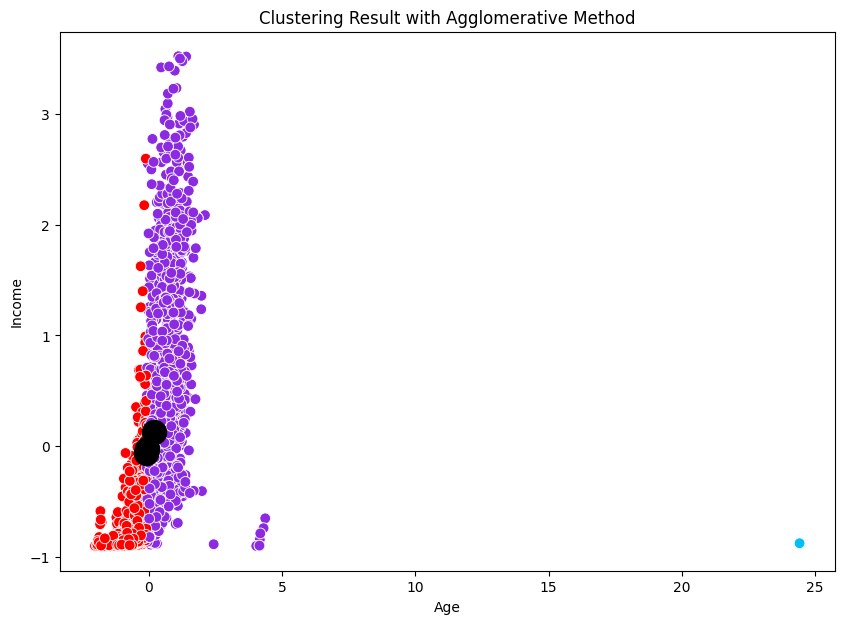

In [28]:
# visualisasi data dengan scater plot antara income dan mntwines menggunakan agglomerative
plt.figure(figsize=(10, 7))
sns.scatterplot(x="Income", y="MntWines", hue=y_pred, palette=["blueviolet", "red", "deepskyblue", "orange", "springgreen"],
                legend=None, data=df_scaled, s=60)
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s=300, c="black")
plt.xlabel('Age')
plt.ylabel('Income')
plt.title('Clustering Result with Agglomerative Method')
plt.show()

<ipython-input-29-fd188f8150ce>:4: UserWarning: The palette list has more values (5) than needed (3), which may not be intended.
  sns.scatterplot(x="Income", y="Age", hue=y_pred, palette=["blueviolet", "red", "deepskyblue", "orange", "springgreen"],


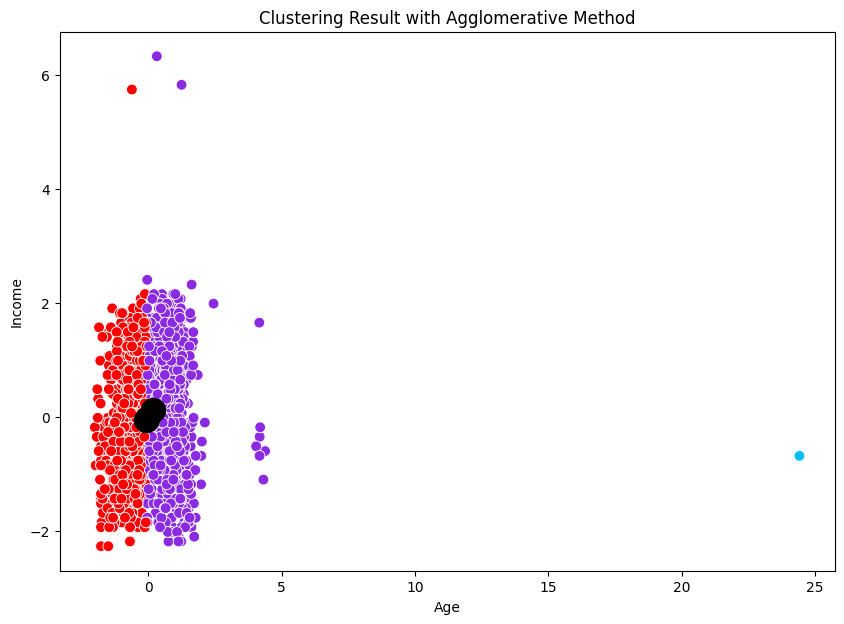

In [29]:
# visualisasi data dengan scater plot antara income dan age menggunakan agglomerative
plt.figure(figsize=(10, 7))
sns.scatterplot(x="Income", y="Age", hue=y_pred, palette=["blueviolet", "red", "deepskyblue", "orange", "springgreen"],
                legend=None, data=df_scaled, s=60)
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s=300, c="black")
plt.xlabel('Age')
plt.ylabel('Income')
plt.title('Clustering Result with Agglomerative Method')
plt.show()

#Single Linkage

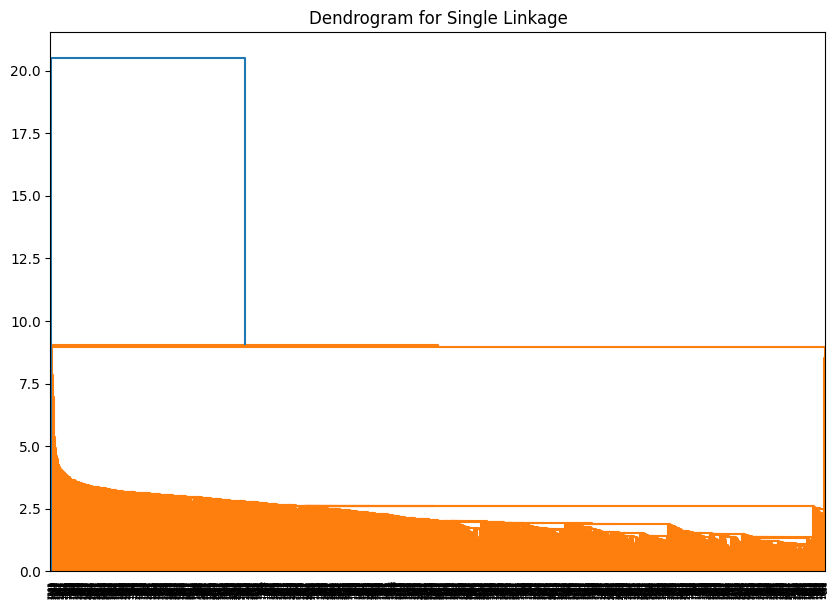

In [30]:
plt.figure(figsize=(10, 7))
plt.title("Dendrogram for Single Linkage")
dend = sch.dendrogram(sch.linkage(df_scaled, method='single'))
plt.show()

#Complete Linkage

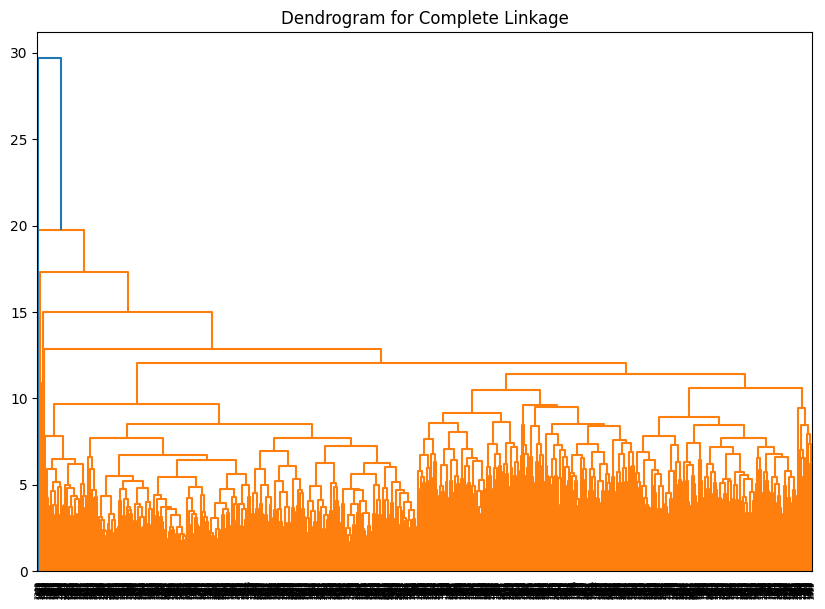

In [31]:
plt.figure(figsize=(10, 7))
plt.title("Dendrogram for Complete Linkage")
dend = sch.dendrogram(sch.linkage(df_scaled, method='complete'))
plt.show()

#Average Linkage

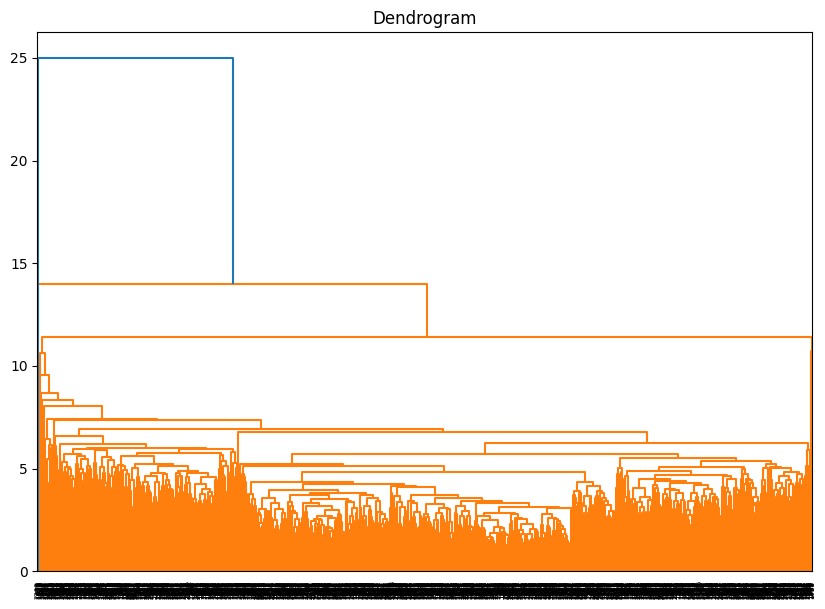

In [32]:
plt.figure(figsize=(10, 7))
plt.title("Dendrogram")
dend = sch.dendrogram(sch.linkage(df_scaled, method='average'))
plt.show()

#Ward Method

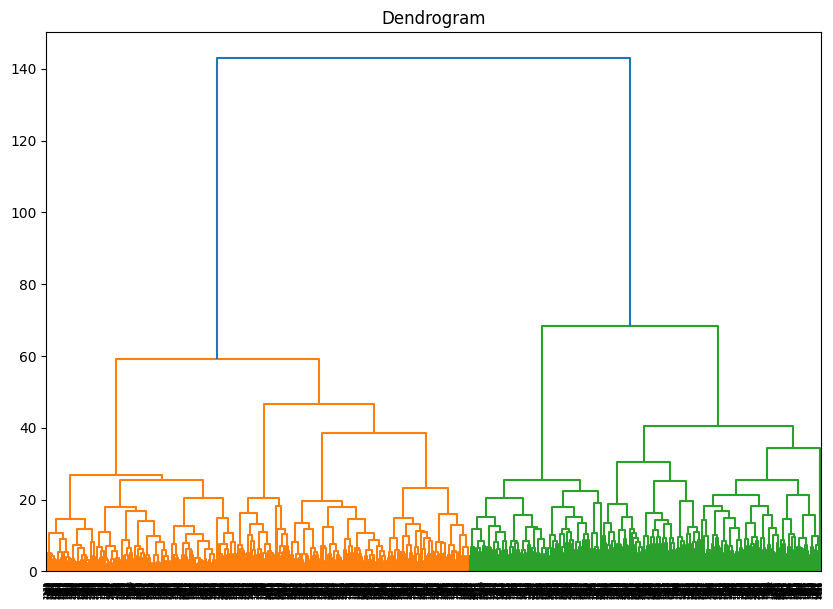

In [33]:
plt.figure(figsize=(10, 7))
plt.title("Dendrogram")
dend = sch.dendrogram(sch.linkage(df_scaled, method='ward'))
plt.show()